In [1]:
# 데이터 전처리 함수
from sklearn import preprocessing

# 결측값 채우기
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace = True)
    df['Cabin'].fillna('N', inplace = True)
    df['Embarked'].fillna('N', inplace = True)
    df['Fare'].fillna(0, inplace = True)
    return df

# 불필요한 열 삭제
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis =1 ,inplace = True)
    return df

# 레이블 인코딩 수행
def encode_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

def transfrom_features(df):
    df = fillna(df)
    df = encode_features(df)
    df = drop_features(df)
    return df


In [2]:
# 데이터 준비
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd

titanic_df = titanic_df = pd.read_csv('C:/sh/study/Study Everyday/data files/titanic/train.csv')
y_titanic_df = titanic_df['Survived']
x_titanic_df = titanic_df.drop('Survived',axis = 1)

x_titanic_df = transfrom_features(x_titanic_df)

# 테스트데이터 분리
x_train, x_test, y_train, y_test = train_test_split(x_titanic_df,y_titanic_df,test_size=0.2,random_state=56)

In [3]:
# 의사결정나무 모델 학습/예측
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 모델 생성
dt_clf = DecisionTreeClassifier(random_state=56)

# 데이터 학습
dt_clf.fit(x_train,y_train)

# 예측
pred = dt_clf.predict(x_test)

# 정확도 출력
print(accuracy_score(y_test,pred))

0.7206703910614525


In [4]:
# 교차검증
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# 모델 생성
dt_clf = DecisionTreeClassifier(random_state=56)

# fold 나누기
kfold = KFold(5)
cv_accuracy = []

for train_index, test_index in kfold.split(x_titanic_df):
    x_train, x_test = x_titanic_df.iloc[train_index], x_titanic_df.iloc[test_index]
    y_train, y_test = y_titanic_df.iloc[train_index], y_titanic_df.iloc[test_index]

    # 모델 학습
    dt_clf.fit(x_train,y_train)
    pred = dt_clf.predict(x_test)

    # 모델 예측
    accuracy = np.round(accuracy_score(y_test,pred),4)
    cv_accuracy.append(accuracy)

print(cv_accuracy)
print(np.mean(cv_accuracy))

[0.7542, 0.7697, 0.8034, 0.764, 0.8202]
0.7823


In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

parameters = {'max_depth' : [2,3,5,10], 'min_samples_split' : [2,3,5], "min_samples_leaf" : [1,5,8]}

grid_dclf = GridSearchCV(dt_clf,param_grid=parameters,scoring='accuracy',cv=5)
grid_dclf.fit(x_train,y_train)

best_est = grid_dclf.best_estimator_

dprediction = best_est.predict(x_test)

accuracy = accuracy_score(y_test,dprediction)
precision = precision_score(y_test,dprediction)
recall = recall_score(y_test,dprediction)

print(accuracy,"\n",precision,"\n",recall)

0.8651685393258427 
 0.819672131147541 
 0.7936507936507936


In [ ]:
# 그래프 시각화
import os
os.environ["PATH"]+=os.pathsep+'C:/Program Files/Graphviz/bin'

from sklearn.tree import export_graphviz
import graphviz

export_graphviz(best_est, out_file='tree.dot',class_names=y_titanic_df.name,feature_names=x_titanic_df.columns,impurity=True,filled=True)

with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)


Featuer Importances : 
[0.136 0.506 0.107 0.022 0.    0.143 0.077 0.009]
Pclass : 0.136
Sex : 0.506
Age : 0.107
SibSp : 0.022
Parch : 0.000
Fare : 0.143
Cabin : 0.077
Embarked : 0.009


<AxesSubplot:>

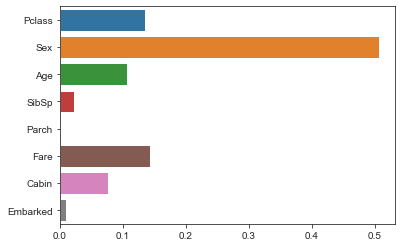

In [24]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출
print("Featuer Importances : \n{}".format(np.round(best_est.feature_importances_,3)))

# feature별 importance 매칭
for name, value in zip(x_titanic_df.columns, best_est.feature_importances_):
    print("{0} : {1:.3f}".format(name, value))

# feature importance를 column별로 시각화 하기
sns.set_style("ticks")
sns.barplot(x = best_est.feature_importances_, y = x_titanic_df.columns)